# Applying Benford's Law to Daily Stock Returns

This is a simple project where I used python to create analyze whether daily stock retruns for a given stock would follow Benford's Law. Take a look.

In [7]:
import re
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np

(72, 43, 30, 26, 22, 19, 17, 13, 10)


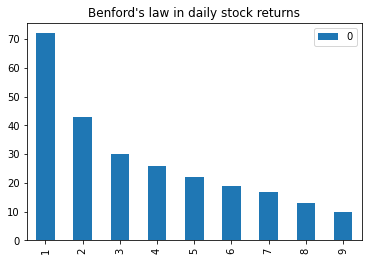

In [8]:
def get_single_stock_data(start_date, end_date, symbol):
    data = web.DataReader(symbol, "yahoo", start_date, end_date)
    return data

start_date = datetime.datetime(2019, 8, 1)
end_date = datetime.datetime(2020, 8, 1)

def display_as_percentage(val):
  return '{:.1f}%'.format(val * 100)

data = lambda x : get_single_stock_data(start_date,end_date,x)
datad = lambda x,start_date,end_date : get_single_stock_data(start_date,end_date,x)
d1_rtrn = lambda x : x['Adj Close'].pct_change(1).dropna()

ticker = "spy"

df = data(ticker)
df['Daily Log Rate of Return'] = (np.log(df['Adj Close']/df['Adj Close'].shift(1)))*100
df = df['Daily Log Rate of Return']
df = pd.DataFrame(df)
df = df.dropna()

stdev = np.std(df)
q1 = df.loc[df['Daily Log Rate of Return']<np.percentile(df, 25)]
q3 = df.loc[df['Daily Log Rate of Return']>np.percentile(df, 75)]
q = pd.concat([q1, q3])
interq = df[~df['Daily Log Rate of Return'].isin(q['Daily Log Rate of Return'])]

def benfordslaw(df):
    num1 = 0
    num2 = 0
    num3 = 0
    num4 = 0
    num5 = 0
    num6 = 0
    num7 = 0
    num8 = 0
    num9 = 0
    total = 0

    for i in range(len(df)):
        total += 1
        num = pd.DataFrame(df.iloc[i:(i+1)])
        x = abs(num['Daily Log Rate of Return'][0])
        if x >= 1:
            x = str(x)
            if re.search(r'\d', x).group() == '1':
                num1 += 1
            elif re.search(r'\d', x).group() == '2':
                num2 += 1
            elif re.search(r'\d', x).group() == '3':
                num3 += 1
            elif re.search(r'\d', x).group() == '4':
                num4 += 1
            elif re.search(r'\d', x).group() == '5':
                num5 += 1
            elif re.search(r'\d', x).group() == '6':
                num6 += 1
            elif re.search(r'\d', x).group() == '7':
                num7 += 1
            elif re.search(r'\d', x).group() == '8':
                num8 += 1
            else:
                num9 += 1
        else:
            x = str(x)
            y = x.strip('0.')
            if re.search(r'\d', y).group() == '1':
                num1 += 1
            elif re.search(r'\d', y).group() == '2':
                num2 += 1
            elif re.search(r'\d', y).group() == '3':
                num3 += 1
            elif re.search(r'\d', y).group() == '4':
                num4 += 1
            elif re.search(r'\d', y).group() == '5':
                num5 += 1
            elif re.search(r'\d', y).group() == '6':
                num6 += 1
            elif re.search(r'\d', y).group() == '7':
                num7 += 1
            elif re.search(r'\d', y).group() == '8':
                num8 += 1
            else:
                num9 += 1
    return num1, num2, num3, num4, num5, num6, num7, num8, num9


print(benfordslaw(df))
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
sizes = benfordslaw(df)
df = pd.DataFrame(sizes, index = labels)

df.plot.bar()
plt.title('Benford\'s law in daily stock returns')
plt.show()